In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt


%matplotlib widget

In [3]:
data_root = "/home/julian/projects/thesis/datasets/converted"

data = {
"front": os.path.join(data_root, "mdv3_innovusion_front"),
"rear":  os.path.join(data_root, "mdv3_innovusion_rear"),
"left":  os.path.join(data_root, "mdv3_ouster_left"),
"right": os.path.join(data_root, "mdv3_ouster_right")
}

In [4]:
for i, path in data.items():
    stamps = np.loadtxt(os.path.join(path, "times", "lidar_timestamps.txt"))
    first = stamps[0,0] #+ stamps[0,1] * 1e9
    timestamps = stamps[:,0] - first + stamps[:,1] * 1e-9
    data[i] = timestamps

In [ ]:
for v in data.values():
    print(v.shape)

In [5]:
# Find the minimum length among the arrays
min_length = min(min(arr.shape[0] for arr in data.values()), 500)

# Create an nx4 matrix by slicing each array to the minimum length
matrix = np.column_stack(((arr[:min_length] for arr in data.values())))
o_matrix = np.column_stack(((arr[:min_length] for key, arr in data.items() if key in ["left", "right"] )))
i_matrix = np.column_stack(((arr[:min_length] for key, arr in data.items() if key in ["front", "rear"] )))

/tmp/ipykernel_20831/3168757306.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  matrix = np.column_stack(((arr[:min_length] for arr in data.values())))
/tmp/ipykernel_20831/3168757306.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  o_matrix = np.column_stack(((arr[:min_length] for key, arr in data.items() if key in ["left", "right"] )))
/tmp/ipykernel_20831/3168757306.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  i_matrix = np.column_stack(((arr[:min_length] for key, arr 

In [6]:
def compute_difference(matrix):
    diff = []
    for i in range(min_length):
        minv = np.min(matrix[i,:])
        maxv = np.max(matrix[i,:])
        diff.append(maxv - minv)
    return diff

diff = compute_difference(matrix)
o_diff = compute_difference(o_matrix)
i_diff = compute_difference(i_matrix)

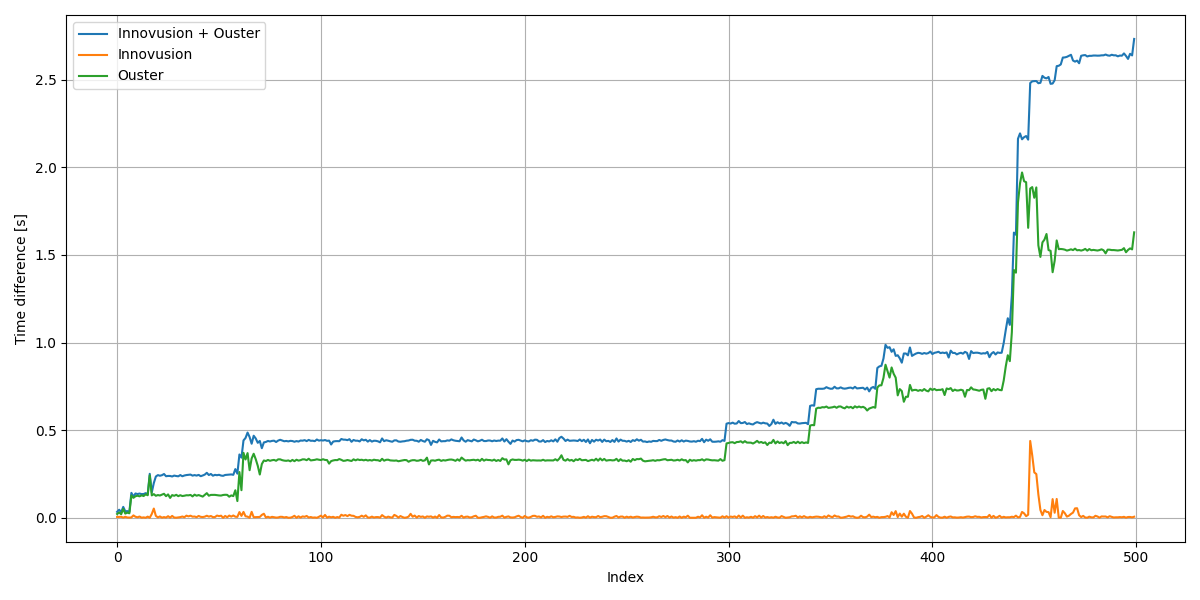

In [7]:
# Create a Matplotlib figure and axis
f = plt.figure(figsize=(12, 6))
# plt.title('Time difference between first and last LiDAR measurement')
plt.xlabel('Index')
plt.ylabel('Time difference [s]')

plt.plot(diff, label='Innovusion + Ouster')
plt.plot(i_diff, label='Innovusion')
plt.plot(o_diff, label='Ouster')
# Customize the legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

f.savefig('figures/time_differences.pdf')

In [ ]:
# Create a Matplotlib figure and axis
plt.figure(figsize=(12, 6))
plt.title('Arrival Time Comparison of Sensor Messages (Last 5 seconds)')
plt.xlabel('Time (s) since Start')
plt.ylabel('Sensor')

# Define colors for each sensor
colors = ['b', 'g', 'r', 'c']

# Plot arrival times for each sensor within the time span
for i, (sensor, timestamps) in enumerate(data.items()):
    # Filter timestamps within the specified time span
    filtered_timestamps = [t for t in timestamps if t <= 2]
    
    plt.scatter(filtered_timestamps, [sensor] * len(filtered_timestamps), label=sensor, color=colors[i], s=200)

# Customize the legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Calculate time differences for each sensor
# time_differences = {sensor: [(t - timestamps[0]).total_seconds() for t in timestamps] for sensor, timestamps in data.items()}
time_differences = data

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Histogram of Time Differences between Sensor Messages')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.hist(time_differences.values(), bins=20, label=list(time_differences.keys()), alpha=0.7)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# Create a violin plot of time differences
plt.figure(figsize=(10, 6))
plt.title('Violin Plot of Time Differences between Sensor Messages')
plt.xlabel('Sensor')
plt.ylabel('Time Difference (seconds)')
plt.violinplot(time_differences.values(), showmedians=True, showextrema=False)
plt.xticks(range(1, len(data) + 1), data.keys())
plt.grid(True)
plt.show()

In [ ]:
# Create a heatmap of message arrivals over time
plt.figure(figsize=(12, 6))
plt.title('Heatmap of Message Arrivals over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Sensor')

# Convert time differences to a 2D numpy array for the heatmap
time_diff_array = np.array([time_differences[sensor] for sensor in data.keys()])

# Plot the heatmap
plt.imshow(time_diff_array, cmap='viridis', aspect='auto')
plt.colorbar(label='Time Difference (seconds)')
plt.yticks(np.arange(len(data)), data.keys())
plt.grid(False)
plt.show()

In [ ]:
plt.close('all')
for i, (key, stamps) in enumerate(data.items()):
    print(stamps.shape)
    plt.scatter(stamps, i * np.ones(stamps.shape[0]), marker='x')
    
    
plt.show()